In [118]:
# Import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [119]:
# Import models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [120]:
# Import model comparison metrics
from sklearn.metrics import mean_squared_error, auc, r2_score

In [121]:
# Import dataset

df = pd.read_csv('candy-data.csv')

In [122]:
# List of independent variables
characteristics = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

### PCA

Carrying out a principal component analysis for identifyig and verifying variable importanct on data explainability.

In [123]:
# Split data into independent variables and target variable
X = df.drop(columns= ['winpercent', 'competitorname'])
y = df.winpercent

In [124]:
# # Standaridize the values

# std_scaler = StandardScaler()
# X_scaled = std_scaler.fit_transform(X=X)

# # PCA

# pca = PCA(random_state=42)
# X_pca = pca.fit_transform(X_scaled)

In [125]:
# # init plot
# fig, ax = plt.subplots(1, 2, sharey=True)
# fig.set_size_inches(15, 5)


# # explained variance ratio as bar chart
# ax[0].bar([i for i in range(1,len(pca.explained_variance_ratio_) + 1)], height = pca.explained_variance_ratio_)
# ax[0].set_xlabel('Number of PCA component')
# ax[0].set_ylabel('Explained Variance Ratio')

# # cumulative explained variance ratio as bar chart
# cummulative_exp_var = np.cumsum(pca.explained_variance_ratio_)
# ax[1].bar([i for i in range(1,len(cummulative_exp_var) + 1)], height = cummulative_exp_var)
# ax[1].set_xlabel('Number of PCA component')
# ax[1].set_ylabel('Cumulative Explained Variance Ratio')
# plt.show()

In [126]:
# # which features contribute the most or are more important for each component?
# pca_components = pca.components_

# # transpose for better usage
# # now the rows represents the features
# pca_comp_t = np.transpose(pca_components)

# features = X.columns
# n_features = len(features)
# pca_idxs = np.arange(1, len(features)+1)
# x_labels = ["PCA {}".format(i) for i in range(1, n_features + 1)]
# bar_width = 0.8

# # define subplots dimension
# n_rows = 4
# n_cols = 4

# fig, ax = plt.subplots(n_rows, n_cols, sharex=False, sharey=True)
# fig.set_size_inches(40, 40)

# rects = []
# index = 0

# # iterate through subplots
# for r in range(n_rows):
#     for c in range(n_cols):
#         if index >= n_features:
#             ax[r,c].set_visible(False)
#         else:
#             # draw the bar chart
#             rect = ax[r,c].bar(pca_idxs, pca_comp_t[index], bar_width)
#             ax[r,c].set_xticks(pca_idxs)
#             ax[r,c].set_xticklabels(x_labels)
#             ax[r,c].set_ylabel('Contribution')
#             ax[r,c].set_xlabel(features[index])
#             index += 1

# plt.show()

## kMeans

1. From the EDA, we realized that chocolate is a must have component for the new candy
2. fruity and chocolate do not got together
3. The candies at the bottom of the winpercent table are almost all 'pluribus' i.e. appearing as small candies in a packet
4. There are no hard candies in top performing candies
5. There are almost no bars in the bottom performing candies, but candies which are have 'bar' characteristic do appear in the top performing candies

Therefore, we drop these from our 

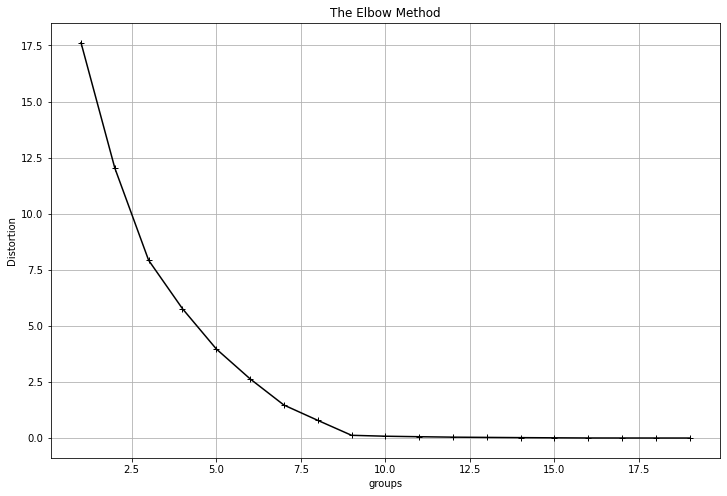

In [127]:
# K means clustering to find main combinations
k_labels = ["caramel", "peanutyalmondy", "nougat", "crispedricewafer", "winpercent"]

df = df.drop(["competitorname", "sugarpercent", "pricepercent"],axis=1)

df = df[(df["chocolate"] == 1) & (df["bar"] == 1) & (df["fruity"] == 0)]
df = df[k_labels]
df["winpercent"] = df["winpercent"]/100  # scale to fit categorical data distances

df_KMeans = df

## unique candy classes
unique_candy_classes = len(df_KMeans.drop_duplicates())

## elbow method
distortions = []
K = range(1,unique_candy_classes)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_KMeans)
    distortions.append(kmeanModel.inertia_)


# graphics
fig = plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.plot(K, distortions, '+-', color="black")
plt.xlabel('groups'); plt.ylabel('Distortion'); plt.grid(True)


plt.show()

according to the above graph, k = 9 is the ideal value

In [129]:
kmeanModel = KMeans(n_clusters=9)
kmeanModel.fit(df_KMeans)

df = pd.DataFrame (data=np.round(kmeanModel.cluster_centers_, 3), columns=k_labels)
df['winpercent'] = df['winpercent']*100  # unscale winpercent to range 0-100
print ('Main Candy subgroups\n')
df.sort_values('winpercent', ascending=False)

Main Candy subgroups



,caramel,peanutyalmondy,nougat,crispedricewafer,winpercent
0,1.0,0.0,0.0,1.0,74.3
4,0.0,0.0,0.0,1.0,68.5
2,1.0,0.0,1.0,0.0,67.0
5,1.0,1.0,1.0,0.0,66.8
8,1.0,0.0,0.0,0.0,64.4
7,1.0,1.0,0.0,1.0,59.5
1,0.0,1.0,0.0,0.0,58.5
3,0.0,0.0,0.0,0.0,53.3
6,0.0,0.0,1.0,0.0,53.3


According the k-means clustering, the best ingredients to build mixed chocolate bar are:
1. caramel
2. crispedricewafer
3. peanutyalmondy